<a href="https://colab.research.google.com/github/20SHUBHAM/rusiia-vs-ukrain-tweet-sentiment-analysis/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

basic steps in sentiment analysis
1.tokenization
2.cleaning the data
3.removing the stopwords
4.classification of words reamining(positive,negative,neutral)

5.aply suppervised machine lernig algorthm for classification
5.calculation

In [ ]:
##import necesary liabraraies
!pip install --upgrade vaderSentiment
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/senstiment analysis,russia vs ukrine war/data.zip")
data

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1504700285901578240,1504573607116169217,2022-03-18 06:04:38 UTC,2022-03-18,06:04:38,0,996476456812335104,salander_lisbet,ʟɪꜱʙᴇᴛʜ 🏴,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Savallsblog', 'name': 'Kim D...",NaN,NaN,NaN,NaN
1,1504700285196943360,1504700285196943360,2022-03-18 06:04:38 UTC,2022-03-18,06:04:38,0,1098950084186853376,tabvamahenga,blackman,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1504700281019256832,1504700281019256832,2022-03-18 06:04:37 UTC,2022-03-18,06:04:37,0,1416510460937981952,bruning_sk,SKB,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1504700279211577345,1504700279211577345,2022-03-18 06:04:37 UTC,2022-03-18,06:04:37,0,1479038633676091396,sirwinston_1874,Sir Winston,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1504700278540361728,1504700278540361728,2022-03-18 06:04:37 UTC,2022-03-18,06:04:37,0,177890300,arabsmf,Arab Social Media Forum,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10008,1504683268553293838,1504683268553293838,2022-03-18 04:57:01 UTC,2022-03-18,04:57:01,0,945657882,cguess27,Chris,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
10009,1504683267815096326,1504683267815096326,2022-03-18 04:57:01 UTC,2022-03-18,04:57:01,0,968203987588734976,frankgibsonmad3,Frank gibson,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
10010,1504683267257253907,1504628066080808967,2022-03-18 04:57:01 UTC,2022-03-18,04:57:01,0,860236781903597568,archfeldspar1,Archfeldspar,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'oldguy_steve', 'name': 'Stev...",NaN,NaN,NaN,NaN
10011,1504683262576263168,1504683262576263168,2022-03-18 04:57:00 UTC,2022-03-18,04:57:00,0,817652,memeorandum,memeorandum,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [ ]:
data=data[["username","tweet","language"]]

In [ ]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [ ]:
##so no column have null values
data["language"].value_counts()

en     8898
und     250
it      207
pt      154
in       68
ru       64
ja       47
hi       36
fr       35
es       26
ar       23
ca       22
pl       19
zh       17
de       14
tl       13
uk       13
ta       11
nl       10
fi       10
el        9
tr        9
te        8
ur        6
bn        6
ro        5
mr        4
cs        3
ht        3
et        3
sv        3
no        2
gu        2
or        2
iw        2
kn        2
ml        2
sl        1
cy        1
da        1
ko        1
eu        1
Name: language, dtype: int64

In [ ]:
nltk.download('stopwords')
stemmer=nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


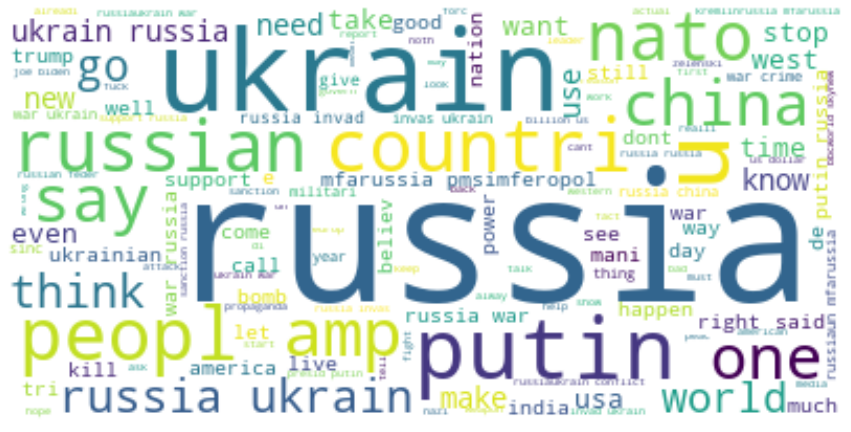

In [ ]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


                                               tweet  Positive  Negative  \
0  savallsblog sem fa molt difícil de creur que u...     0.000     0.000   
1  unhumanright law prevail justic prevail everi ...     0.000     0.095   
2  actual put larg letter onto flat land area out...     0.000     0.245   
3  il numero di person evacu russia dal donbass e...     0.138     0.000   
4  russia sow conspiraci theori us bioweapon ukra...     0.000     0.000   

   Neutral  
0    1.000  
1    0.905  
2    0.755  
3    0.862  
4    1.000  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


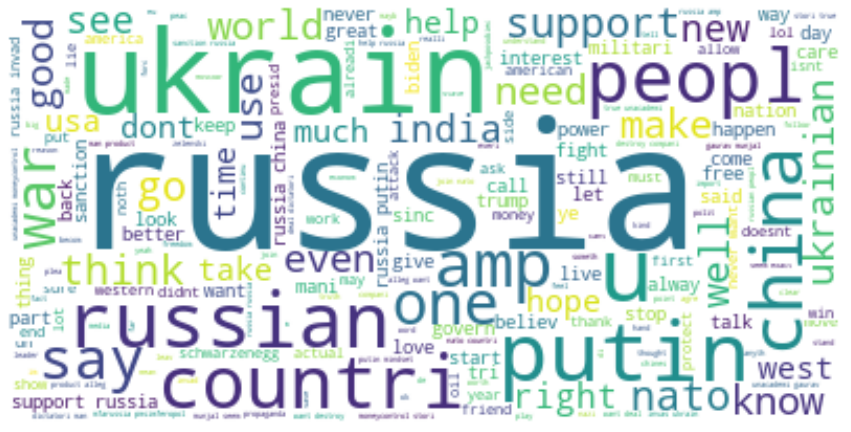

In [ ]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

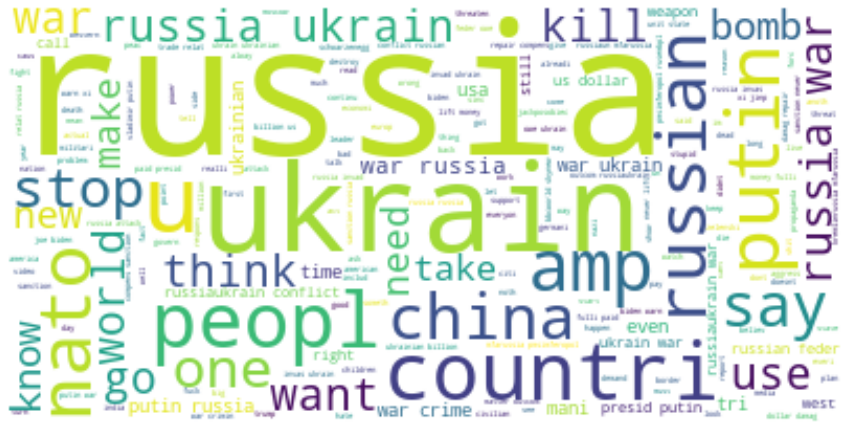

In [ ]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()